##Import Functions

In [189]:
## Import Necessary Functions 
import numpy as np
import matplotlib.pyplot as plt


In [190]:
#You will use Vine Dataset you can get the detail in the URL below
#https://archive.ics.uci.edu/ml/datasets/Wine

from sklearn.datasets import load_wine
vine = load_wine()


In [191]:
# PRINT FOR YOUR INTUITION SO YOU KNOW THE DIMENSIONS YOU ARE WORKING WITH
print(vine.data.shape) #.data contains the features
print(vine.target.shape)
print(vine.target[0]) #.target contains the target variables

(178, 13)
(178,)
0


In [192]:
#SPLIT THE DATA INTO TRAINING AND TESTING SET
#WHEN CALLING THE DATA use vine.data instance as well as vine.target.astype('int')
#THE SPLIT OF DATA IS UPTO YOU

from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(vine.data, vine.target.astype('int'))

In [193]:
#CHECK THE DIMSIONS
X2_train.shape, X2_test.shape
print(y2_train) 
print(y2_test)

[1 2 0 1 1 0 1 0 0 0 2 0 1 0 0 2 0 1 1 2 0 1 1 2 0 1 1 2 0 1 0 0 1 0 2 1 1
 1 1 2 1 1 1 1 2 2 0 2 0 0 1 1 1 1 1 2 0 1 2 1 0 0 2 1 1 2 2 0 0 0 2 0 1 1
 0 0 2 0 1 0 2 1 2 1 2 0 1 2 0 2 0 0 2 1 1 0 2 1 2 0 1 2 1 0 1 0 1 1 2 2 1
 2 0 0 1 1 1 2 0 2 0 2 1 1 1 0 1 0 0 1 1 2 2]
[2 0 1 0 1 2 0 0 1 2 0 2 0 2 1 1 2 0 1 1 2 1 2 0 2 1 1 0 1 0 2 1 1 2 0 0 1
 0 0 1 0 1 2 1 2]


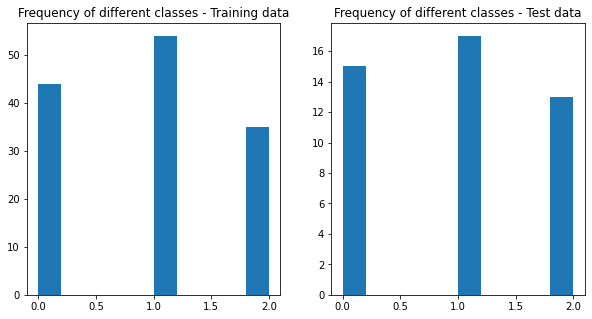

In [194]:
#CHECK THE FREQUENCY FOR YOUR INTUITION
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y2_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y2_test);
plt.title('Frequency of different classes - Test data');


In [195]:
# DEFINE THE MODEL USING LogisticRegression Function

from sklearn.linear_model import LogisticRegression

clf2 = LogisticRegression(C=50, max_iter=5, n_jobs=5, penalty='l1', solver='saga', tol=0.01, verbose=2)


In [196]:
#FIT THE DATA TO THE MODEL 
#WILL TAKE 3-5 MIN
clf2.fit(X2_train, y2_train)

max_iter reached after 0 seconds


[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=50, max_iter=5, n_jobs=5, penalty='l1', solver='saga',
                   tol=0.01, verbose=2)

Score against training and test data

In [197]:
#using clf2.score to get the training score
train_score2 = clf2.score(X2_train, y2_train)
print(train_score2)

0.6015037593984962


In [198]:
#similarly get the score for the test data
test_score2 = clf2.score(X2_test, y2_test)
print(test_score2)

0.5555555555555556


Plot Confusion matrix

In [199]:
from sklearn import metrics

#FIRST GET THE PREDICTION USING clf2.predict
y2_pred = clf2.predict(X2_test)

#Then use metrics.confusion_matrix
cm = metrics.confusion_matrix(y2_test, y2_pred)
print(cm)

[[15  0  0]
 [ 7 10  0]
 [ 9  4  0]]


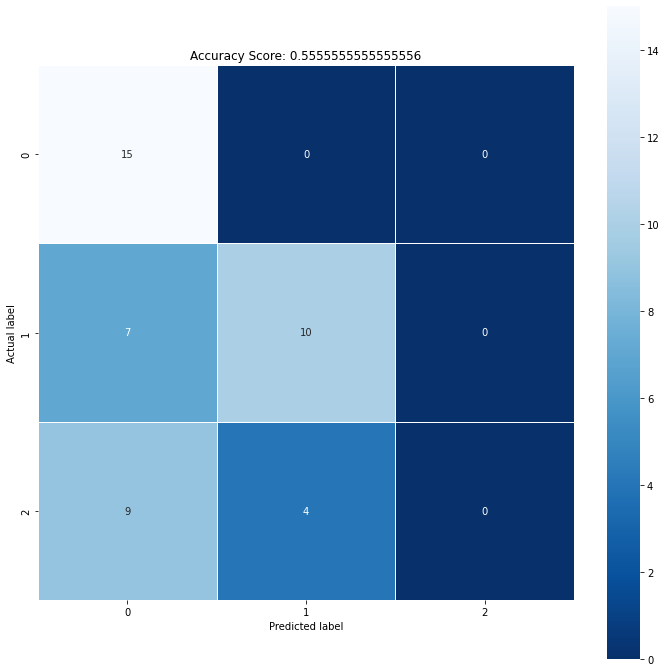

In [200]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(test_score2)
plt.title(all_sample_title);